<a href="https://colab.research.google.com/github/roni762583/bible-data-science.github.io/blob/master/3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

# URL of the raw file
file_url = 'https://raw.githubusercontent.com/roni762583/bible-data-science.github.io/master/data/torahNoSpaces.txt'

# Send a GET request
response = requests.get(file_url)

# Check if the request was successful
if response.status_code == 200:
    # Write the file content to a local file
    with open('torahNoSpaces.txt', 'wb') as file:
        file.write(response.content)
    print('File downloaded successfully!')
else:
    print('Failed to download the file. Status code:', response.status_code)


File downloaded successfully!


In [2]:
# code stats
# Define a function to analyze the file content, focusing on Hebrew characters
def analyze_hebrew_file(file_path):
    # Initialize a dictionary to hold the count of each unique Hebrew letter
    hebrew_letter_counts = {}

    # Initialize a variable to hold the total letter count
    total_hebrew_letters = 0

    # Open the file and read its content
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Iterate through each character in the line
            for char in line:
                # Check if the character is a Hebrew letter
                # Hebrew Unicode block ranges from U+0590 to U+05FF
                if '\u0590' <= char <= '\u05FF':
                    total_hebrew_letters += 1
                    # If the character is already in the dictionary, increment its count
                    if char in hebrew_letter_counts:
                        hebrew_letter_counts[char] += 1
                    # If the character is not in the dictionary, add it with a count of 1
                    else:
                        hebrew_letter_counts[char] = 1

    # Print the total number of Hebrew letters
    print(f'Total number of Hebrew letters: {total_hebrew_letters}')

    # Print the count of each unique Hebrew letter
    print('\nCount of each unique Hebrew letter:')
    for letter, count in sorted(hebrew_letter_counts.items()):
        print(f'{letter}: {count}')

# Specify the path to your file
file_path = 'torahNoSpaces.txt'

# Call the function with the path to your downloaded file
analyze_hebrew_file(file_path)


Total number of Hebrew letters: 304805

Count of each unique Hebrew letter:
א: 27059
ב: 16345
ג: 2109
ד: 7032
ה: 28056
ו: 30513
ז: 2198
ח: 7189
ט: 1804
י: 31531
ך: 3358
כ: 8610
ל: 21570
ם: 10624
מ: 14466
ן: 4259
נ: 9867
ס: 1833
ע: 11250
ף: 830
פ: 3975
ץ: 1035
צ: 2927
ק: 4695
ר: 18125
ש: 15595
ת: 17950


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def arrange_text_3d(file_path, page_length, page_width):
    # Read the file and parse its content
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Define dimensions of the 3D structure
    num_pages = (len(text) - 1) // (page_length * page_width) + 1
    num_chars_per_page = page_length * page_width
    num_chars_last_page = len(text) % (page_length * page_width)

    # Create a 3D array to hold the characters
    text_3d = np.full((num_pages, page_length, page_width), '', dtype='<U1')

    # Populate the 3D structure with characters from the file
    for i, char in enumerate(text):
        page_index = i // num_chars_per_page
        char_index_within_page = i % num_chars_per_page
        row_index = char_index_within_page // page_width
        col_index = char_index_within_page % page_width
        text_3d[page_index, row_index, col_index] = char

    return text_3d


# Specify the path to your file
file_path = 'torahNoSpaces.txt'

# Set the dimensions of each page
page_length = 3
page_width = 3

# Arrange text into 3D structure
text_3d = arrange_text_3d(file_path, page_length, page_width)
print(text_3d)



[[['ב' 'ר' 'א']
  ['ש' 'י' 'ת']
  ['ב' 'ר' 'א']]

 [['א' 'ל' 'ה']
  ['י' 'ם' 'א']
  ['ת' 'ה' 'ש']]

 [['מ' 'י' 'ם']
  ['ו' 'א' 'ת']
  ['ה' 'א' 'ר']]

 ...

 [['ש' 'ר' 'ע']
  ['ש' 'ה' 'מ']
  ['ש' 'ה' 'ל']]

 [['ע' 'י' 'נ']
  ['י' 'כ' 'ל']
  ['י' 'ש' 'ר']]

 [['א' 'ל' '']
  ['' '' '']
  ['' '' '']]]


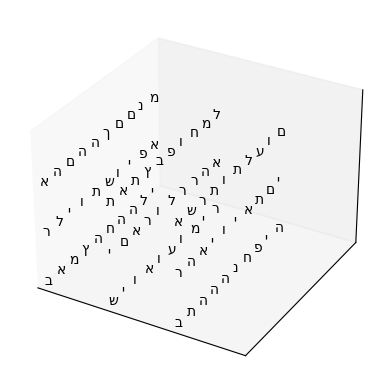

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_volume(text_3d):
    # Setup
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Get dimensions of the 3D text
    page_length, page_width, _ = text_3d.shape

    # Plotting
    count = 0
    for i in range(page_length):
        for j in range(page_width):
            for k in range(len(text_3d[i, j])):
                char = text_3d[i, j, k]
                if char != '':
                    # Plot Hebrew letter at each position
                    ax.text(j, i, k, char, color='black', fontsize=10)  # Adjust color and fontsize as needed
                    count += 1
                    if count >= 100:
                        break
            if count >= 100:
                break
        if count >= 100:
            break

    # Set plot limits
    ax.set_xlim(0, page_width)
    ax.set_ylim(0, page_length)
    ax.set_zlim(0, len(text_3d[0, 0]))

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    # Show plot
    plt.show()

# Example usage: Create a 3D graph using the first 100 characters from text_3d
plot_3d_volume(text_3d[:10, :10, :10])  # Limiting to the first 10x10x10 characters for demonstration


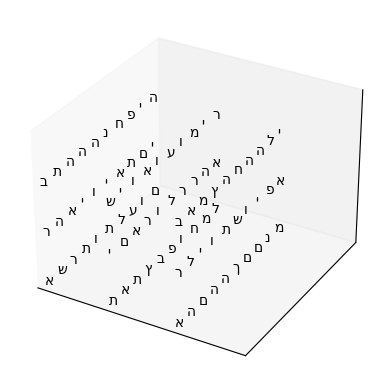

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_volume(text_3d):
    # Setup
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Get dimensions of the 3D text
    page_length, page_width, _ = text_3d.shape

    # Plotting
    count = 0
    for i in range(page_length):
        for j in reversed(range(page_width)):  # Reverse the order of iteration for rows
            for k in reversed(range(len(text_3d[i, j]))):  # Reverse the order of iteration for columns
                char = text_3d[i, j, k]
                if char != '':
                    # Plot Hebrew letter at each position
                    ax.text(page_width - j - 1, i, len(text_3d[i, j]) - k - 1, char, color='black', fontsize=10)  # Adjust color and fontsize as needed
                    count += 1
                    if count >= 100:
                        break
            if count >= 100:
                break
        if count >= 100:
            break

    # Set plot limits
    ax.set_xlim(0, page_width)
    ax.set_ylim(0, page_length)
    ax.set_zlim(0, len(text_3d[0, 0]))

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    # Show plot
    plt.show()

# Example usage: Create a 3D graph using the first 100 characters from text_3d
plot_3d_volume(text_3d[:10, :10, :10])  # Limiting to the first 10x10x10 characters for demonstration


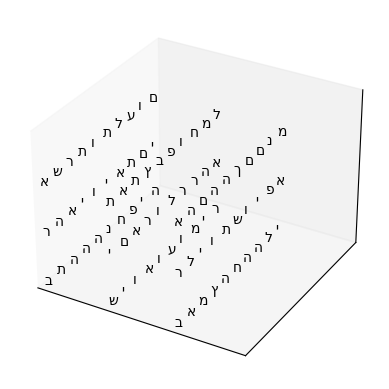

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_volume(text_3d):
    # Setup
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Get dimensions of the 3D text
    page_length, page_width, _ = text_3d.shape

    # Plotting
    count = 0
    for i in range(page_length):
        for j in reversed(range(page_width)):  # Reverse the order of iteration for rows
            for k in range(len(text_3d[i, j])):  # Keep the order of iteration for columns
                char = text_3d[i, j, k]
                if char != '':
                    # Plot Hebrew letter at each position
                    ax.text(page_width - j - 1, i, k, char, color='black', fontsize=10)  # Adjust color and fontsize as needed
                    count += 1
                    if count >= 100:
                        break
            if count >= 100:
                break
        if count >= 100:
            break

    # Set plot limits
    ax.set_xlim(0, page_width)
    ax.set_ylim(0, page_length)
    ax.set_zlim(0, len(text_3d[0, 0]))

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    # Show plot
    plt.show()

# Example usage: Create a 3D graph using the first 100 characters from text_3d
plot_3d_volume(text_3d[:10, :10, :10])  # Limiting to the first 10x10x10 characters for demonstration


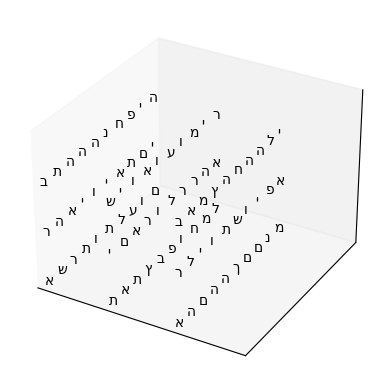

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_volume(text_3d):
    # Setup
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Get dimensions of the 3D text
    page_length, page_width, _ = text_3d.shape

    # Plotting
    count = 0
    for i in range(page_length):
        for j in reversed(range(page_width)):  # Reverse the order of iteration for rows
            for k in range(len(text_3d[i, j])):  # Iterate from first column to last column
                char = text_3d[i, j, k]
                if char != '':
                    # Plot Hebrew letter at each position
                    ax.text(page_width - j - 1, i, len(text_3d[i, j]) - k - 1, char, color='black', fontsize=10)  # Adjust color and fontsize as needed
                    count += 1
                    if count >= 100:
                        break
            if count >= 100:
                break
        if count >= 100:
            break

    # Set plot limits
    ax.set_xlim(0, page_width)
    ax.set_ylim(0, page_length)
    ax.set_zlim(0, len(text_3d[0, 0]))

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    # Show plot
    plt.show()

# Example usage: Create a 3D graph using the first 100 characters from text_3d
plot_3d_volume(text_3d[:10, :10, :10])  # Limiting to the first 10x10x10 characters for demonstration


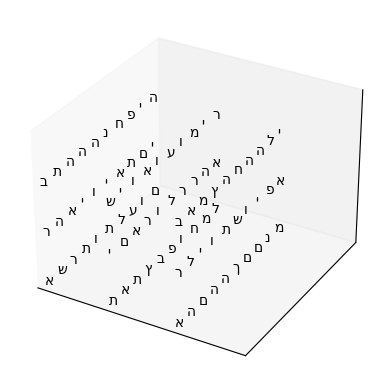

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_volume(text_3d):
    # Setup
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Get dimensions of the 3D text
    page_length, page_width, _ = text_3d.shape

    # Plotting
    count = 0
    for i in range(page_length):
        for j in reversed(range(page_width)):  # Reverse the order of iteration for rows
            for k in range(len(text_3d[i, j])):  # Iterate from first column to last column
                char_index = text_3d[i, j, k]
                if char_index is not None:
                    # Plot index of the character at each position
                    ax.text(page_width - j - 1, i, len(text_3d[i, j]) - k - 1, char_index, color='black', fontsize=10)  # Adjust color and fontsize as needed
                    count += 1
                    if count >= 100:
                        break
            if count >= 100:
                break
        if count >= 100:
            break

    # Set plot limits
    ax.set_xlim(0, page_width)
    ax.set_ylim(0, page_length)
    ax.set_zlim(0, len(text_3d[0, 0]))

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    # Show plot
    plt.show()

# Example usage: Create a 3D graph using the first 100 characters from text_3d
plot_3d_volume(text_3d[:10, :10, :10])  # Limiting to the first 10x10x10 characters for demonstration


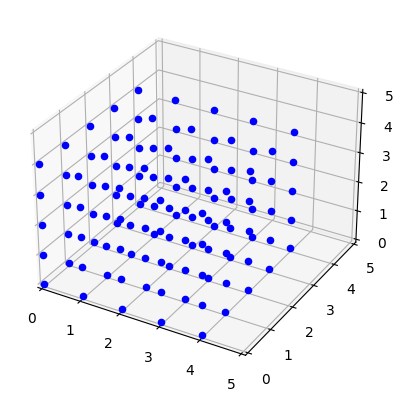

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_volume(X, Y, Z):
    # Setup
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plotting
    for x in range(X):
        for y in range(Y):
            for z in range(Z):
                # Determine graphical object based on position
                # Here, we'll just plot a sphere at each position
                ax.scatter(x, y, z, c='b', marker='o')  # Change marker to plot different shapes

    # Set plot limits
    ax.set_xlim(0, X)
    ax.set_ylim(0, Y)
    ax.set_zlim(0, Z)

    # Show plot
    plt.show()

# Example usage: Create a 3D graph with dimensions 5x5x5
plot_3d_volume(X=5, Y=5, Z=5)


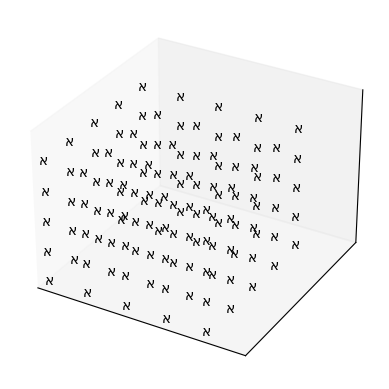

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_volume(X, Y, Z):
    # Setup
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plotting
    for x in range(X):
        for y in range(Y):
            for z in range(Z):
                # Plot Hebrew letter 'א' at each position
                ax.text(x, y, z, 'א', color='black', fontsize=10)  # Adjust color and fontsize as needed

    # Set plot limits
    ax.set_xlim(0, X)
    ax.set_ylim(0, Y)
    ax.set_zlim(0, Z)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    # Show plot
    plt.show()

# Example usage: Create a 3D graph with dimensions 5x5x5
plot_3d_volume(X=5, Y=5, Z=5)


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_text(text_3d, num_pages_to_plot):
    # Setup
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Determine dimensions of the 3D text
    pages, rows, cols = text_3d.shape

    # Plotting
    for i in range(pages):
        for j in range(rows):
            for k in range(cols):
                char = text_3d[i, j, k]
                if char != '':
                    # Determine position of character in 3D space
                    x = k
                    y = j
                    z = i
                    # Plot character at its position
                    ax.text(x, y, z, char, color='black', fontsize=10)

    # Set plot limits
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_zlim(0, pages)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    # Show plot
    plt.show()

# Example usage: Plot the first 5 pages of the 3D text
plot_3d_text(text_3d, num_pages_to_plot=5)


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x786ff272d090> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x786ff272c310> (for post_execute):


KeyboardInterrupt: 

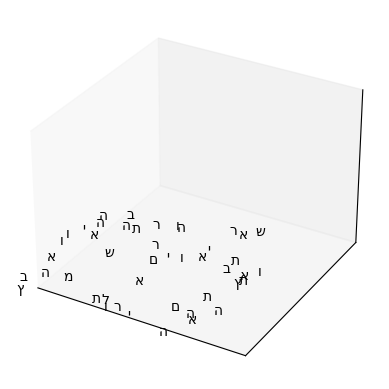

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_text(text_3d, num_pages_to_plot):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Set plot limits
    ax.set_xlim(0, len(text_3d[0][0]))
    ax.set_ylim(0, len(text_3d[0]))
    ax.set_zlim(0, len(text_3d))

    # Iterate over each page, up to num_pages_to_plot
    for i, page in enumerate(text_3d[:num_pages_to_plot]):
        # Iterate over each row in the page
        for j, row in enumerate(page):
            # Iterate over each character in the row
            for k, char in enumerate(row):
                if char != '':
                    # Add more randomness to the placement of characters within each cell
                    x = k + np.random.uniform(-0.5, 0.5)
                    y = j + np.random.uniform(-0.5, 0.5)
                    z = i + np.random.uniform(-0.5, 0.5)
                    ax.text(x, y, z, char, color='black', fontsize=10)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    plt.show()

# Plot the first 5 pages of the 3D text
plot_3d_text(text_3d, num_pages_to_plot=5)


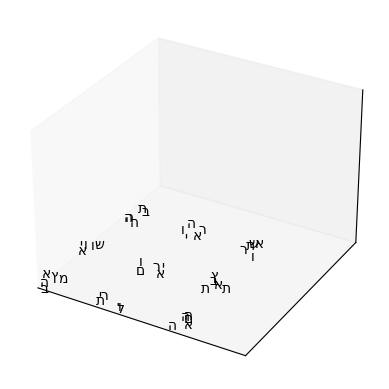

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_text(text_3d, num_pages_to_plot):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Set plot limits
    ax.set_xlim(0, len(text_3d[0][0]))
    ax.set_ylim(0, len(text_3d[0]))
    ax.set_zlim(0, len(text_3d))

    # Iterate over each page, up to num_pages_to_plot
    for i, page in enumerate(text_3d[:num_pages_to_plot]):
        # Iterate over each row in the page
        for j, row in enumerate(page):
            # Iterate over each character in the row
            for k, char in enumerate(row):
                if char != '':
                    # Add some randomness to the placement of characters within each cell
                    x = k + np.random.uniform(-0.2, 0.2)
                    y = j + np.random.uniform(-0.2, 0.2)
                    z = i + np.random.uniform(-0.2, 0.2)
                    ax.text(x, y, z, char, color='black', fontsize=10)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    plt.show()

# Plot the first 5 pages of the 3D text
plot_3d_text(text_3d, num_pages_to_plot=5)



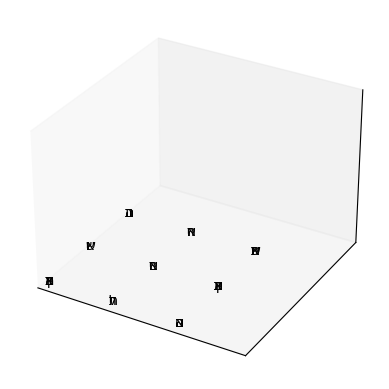

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_text(text_3d, num_pages_to_plot):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Calculate spacing between characters
    spacing = 1.0

    # Plot the characters
    for i, page in enumerate(text_3d[:num_pages_to_plot]):
        for j, row in enumerate(page):
            for k, char in enumerate(row):
                if char != '':
                    ax.text(k * spacing, j * spacing, i * spacing, char, color='black', fontsize=10)

    # Set plot limits
    ax.set_xlim(0, len(text_3d[0][0]) * spacing)
    ax.set_ylim(0, len(text_3d[0]) * spacing)
    ax.set_zlim(0, len(text_3d) * spacing)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    plt.show()

# Plot the first 5 pages of the 3D text
plot_3d_text(text_3d, num_pages_to_plot=5)


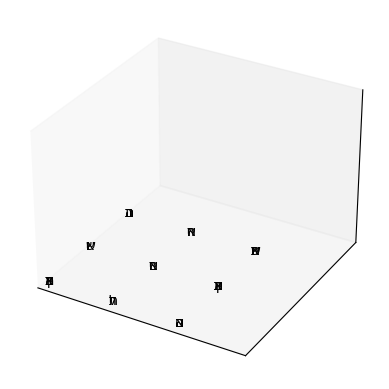

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_text(text_3d, num_pages_to_plot):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the characters
    for i, page in enumerate(text_3d[:num_pages_to_plot]):
        for j, row in enumerate(page):
            for k, char in enumerate(row):
                if char != '':
                    ax.text(k, j, i, char, color='black', fontsize=10)

    # Set plot limits
    ax.set_xlim(0, len(text_3d[0][0]))
    ax.set_ylim(0, len(text_3d[0]))
    ax.set_zlim(0, len(text_3d))

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    plt.show()

# Plot the first 5 pages of the 3D text
plot_3d_text(text_3d, num_pages_to_plot=5)


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_text_with_grid(text_3d, num_pages_to_plot):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the characters
    for i, page in enumerate(text_3d[:num_pages_to_plot]):
        for j, row in enumerate(page):
            for k, char in enumerate(row):
                if char != '':
                    ax.text(k, j, i, char, color='black', fontsize=10)

    # Plot the grid lines between the volumes
    x_size = len(text_3d[0][0])
    y_size = len(text_3d[0])
    z_size = len(text_3d)

    for i in range(1, x_size):
        for j in range(1, y_size):
            ax.plot([i, i], [j, j], [0, z_size], color='gray', alpha=0.5)

    for j in range(1, y_size):
        for k in range(1, z_size):
            ax.plot([0, x_size], [j, j], [k, k], color='gray', alpha=0.5)

    for i in range(1, x_size):
        for k in range(1, z_size):
            ax.plot([i, i], [0, y_size], [k, k], color='gray', alpha=0.5)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    plt.show()

# Plot the first 5 pages of the 3D text with grid
plot_3d_text_with_grid(text_3d, num_pages_to_plot=5)


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x786ff272d090> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x786ff272c310> (for post_execute):


KeyboardInterrupt: 

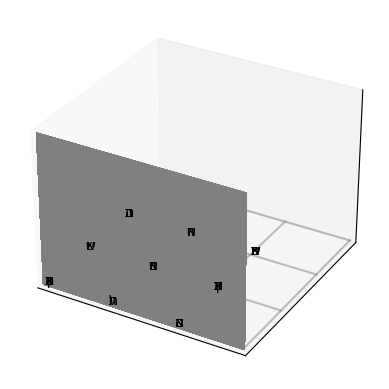

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_text_with_grid(text_3d, num_pages_to_plot):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the characters
    for i, page in enumerate(text_3d[:num_pages_to_plot]):
        for j, row in enumerate(page):
            for k, char in enumerate(row):
                if char != '':
                    ax.text(k, j, i, char, color='black', fontsize=10)

    # Plot the grid
    x_size = len(text_3d[0][0])
    y_size = len(text_3d[0])
    z_size = len(text_3d)

    for i in range(x_size + 1):
        ax.plot([i, i], [0, y_size], [0, 0], color='gray', alpha=0.5)

    for j in range(y_size + 1):
        ax.plot([0, x_size], [j, j], [0, 0], color='gray', alpha=0.5)

    for k in range(z_size + 1):
        ax.plot([0, x_size], [0, 0], [k, k], color='gray', alpha=0.5)

    # Set limits and remove axis labels
    ax.set_xlim([0, x_size])
    ax.set_ylim([0, y_size])
    ax.set_zlim([0, z_size])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    plt.show()

# Plot the first 5 pages of the 3D text with grid
plot_3d_text_with_grid(text_3d, num_pages_to_plot=5)


KeyboardInterrupt: 

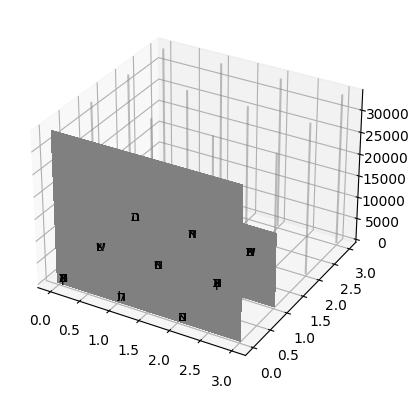

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_text_with_grid(text_3d, num_pages_to_plot):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the characters
    for i, page in enumerate(text_3d[:num_pages_to_plot]):
        for j, row in enumerate(page):
            for k, char in enumerate(row):
                if char != '':
                    ax.text(k, j, i, char, color='black', fontsize=10)

    # Plot the grid
    x_size = len(text_3d[0][0])
    y_size = len(text_3d[0])
    z_size = len(text_3d)

    for i in range(x_size + 1):
        for j in range(y_size + 1):
            ax.plot([i, i], [j, j], [0, z_size], color='gray', alpha=0.5)

    for j in range(y_size + 1):
        for k in range(z_size + 1):
            ax.plot([0, x_size], [j, j], [k, k], color='gray', alpha=0.5)

    for i in range(x_size + 1):
        for k in range(z_size + 1):
            ax.plot([i, i], [0, y_size], [k, k], color='gray', alpha=0.5)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    plt.show()

# Plot the first 5 pages of the 3D text with grid
plot_3d_text_with_grid(text_3d, num_pages_to_plot=5)


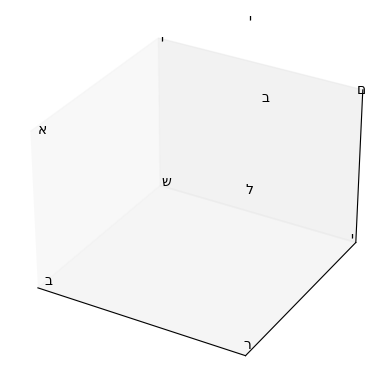

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_text(text_3d, num_pages_to_plot):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Iterate over each page, up to num_pages_to_plot
    for i, page in enumerate(text_3d[:num_pages_to_plot]):
        # Iterate over each row in the page
        for j, row in enumerate(page):
            # Iterate over each character in the row
            for k, char in enumerate(row):
                if char != '':
                    ax.text(k, j, i, char, color='black', fontsize=10)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    plt.show()

# Plot the first 5 pages of the 3D text
plot_3d_text(text_3d, num_pages_to_plot=3)


<ipython-input-15-8c3367b983f0>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handle = ax.scatter([], [], [], c=color, marker='o', s=marker_size)
<ipython-input-15-8c3367b983f0>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(k, j, i, c=char_color_map[char], marker='o', s=marker_size)


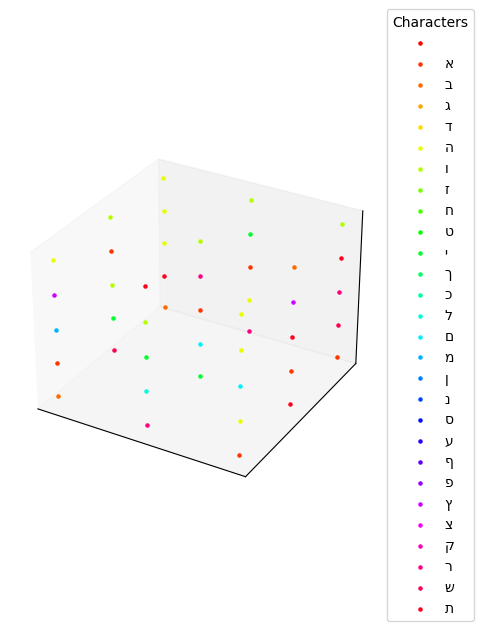

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

def plot_3d_text(text_3d, num_pages_to_plot, marker_size=10):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Generate colors for characters
    unique_chars = sorted(set(char for page in text_3d for row in page for char in row))
    num_unique_chars = len(unique_chars)
    cmap = plt.get_cmap('hsv')
    colors = cmap(np.linspace(0, 1, num_unique_chars))

    # Create a dictionary to map characters to colors
    char_color_map = {char: color for char, color in zip(unique_chars, colors)}

    # Plot each character separately to generate a legend
    handles = []
    labels = []
    for char, color in char_color_map.items():
        handle = ax.scatter([], [], [], c=color, marker='o', s=marker_size)
        handles.append(handle)
        labels.append(char)

    # Iterate over each page, up to num_pages_to_plot
    for i, page in enumerate(text_3d[:num_pages_to_plot]):
        # Iterate over each row in the page
        for j, row in enumerate(page):
            # Iterate over each character in the row
            for k, char in enumerate(row):
                if char != '':
                    ax.scatter(k, j, i, c=char_color_map[char], marker='o', s=marker_size)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    # Add legend to the right
    ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Characters')

    plt.show()

# Plot the first 5 pages of the 3D text
plot_3d_text(text_3d, num_pages_to_plot=5, marker_size=5)



<ipython-input-14-33a4cd3613a0>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  handle = ax.scatter([], [], [], c=color, marker='o', s=marker_size)
<ipython-input-14-33a4cd3613a0>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(k, j, i, c=char_color_map[char], marker='o', s=marker_size)


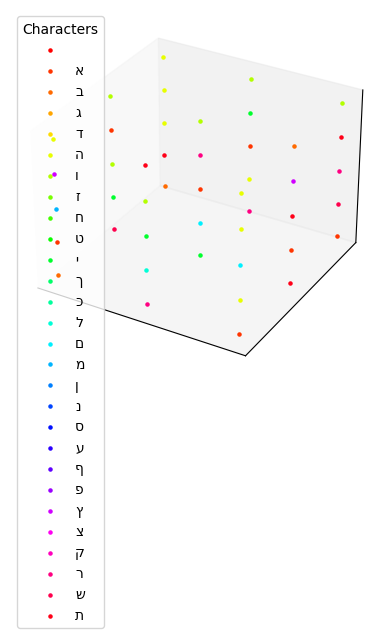

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

def plot_3d_text(text_3d, num_pages_to_plot, marker_size=10):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Generate colors for characters
    unique_chars = sorted(set(char for page in text_3d for row in page for char in row))
    num_unique_chars = len(unique_chars)
    cmap = plt.get_cmap('hsv')
    colors = cmap(np.linspace(0, 1, num_unique_chars))

    # Create a dictionary to map characters to colors
    char_color_map = {char: color for char, color in zip(unique_chars, colors)}

    # Plot each character separately to generate a legend
    handles = []
    labels = []
    for char, color in char_color_map.items():
        handle = ax.scatter([], [], [], c=color, marker='o', s=marker_size)
        handles.append(handle)
        labels.append(char)

    # Iterate over each page, up to num_pages_to_plot
    for i, page in enumerate(text_3d[:num_pages_to_plot]):
        # Iterate over each row in the page
        for j, row in enumerate(page):
            # Iterate over each character in the row
            for k, char in enumerate(row):
                if char != '':
                    ax.scatter(k, j, i, c=char_color_map[char], marker='o', s=marker_size)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    # Add legend
    ax.legend(handles, labels, loc='upper left', title='Characters')

    plt.show()

# Plot the first 5 pages of the 3D text
plot_3d_text(text_3d, num_pages_to_plot=5, marker_size=5)


<ipython-input-13-f1657317d8b1>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(k, j, i, c=char_color_map[char], marker='o', s=marker_size)


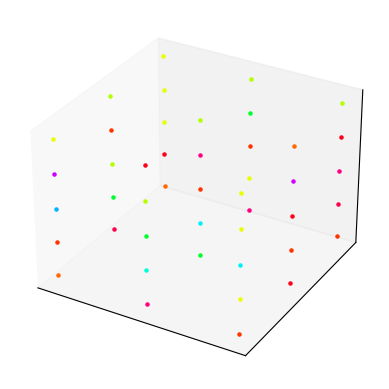

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_text(text_3d, num_pages_to_plot, marker_size=10):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Generate colors for characters
    unique_chars = sorted(set(char for page in text_3d for row in page for char in row))
    num_unique_chars = len(unique_chars)
    cmap = plt.get_cmap('hsv')
    colors = cmap(np.linspace(0, 1, num_unique_chars))

    # Create a dictionary to map characters to colors
    char_color_map = {char: color for char, color in zip(unique_chars, colors)}

    # Iterate over each page, up to num_pages_to_plot
    for i, page in enumerate(text_3d[:num_pages_to_plot]):
        # Iterate over each row in the page
        for j, row in enumerate(page):
            # Iterate over each character in the row
            for k, char in enumerate(row):
                if char != '':
                    ax.scatter(k, j, i, c=char_color_map[char], marker='o', s=marker_size)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    plt.show()

# Plot the first 5 pages of the 3D text
plot_3d_text(text_3d, num_pages_to_plot=5, marker_size=5)


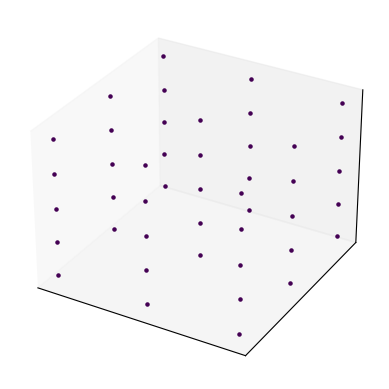

In [12]:
def plot_3d_text(text_3d, num_pages_to_plot, marker_size=10):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Generate random colors for characters
    colors = np.random.rand(65536)  # Assuming the maximum Unicode value

    # Iterate over each page, up to num_pages_to_plot
    for i, page in enumerate(text_3d[:num_pages_to_plot]):
        # Iterate over each row in the page
        for j, row in enumerate(page):
            # Iterate over each character in the row
            for k, char in enumerate(row):
                if char != '':
                    ax.scatter(k, j, i, c=colors[ord(char)], marker='o', s=marker_size)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    plt.show()

# Plot the first 5 pages of the 3D text
plot_3d_text(text_3d, num_pages_to_plot=5, marker_size=5)


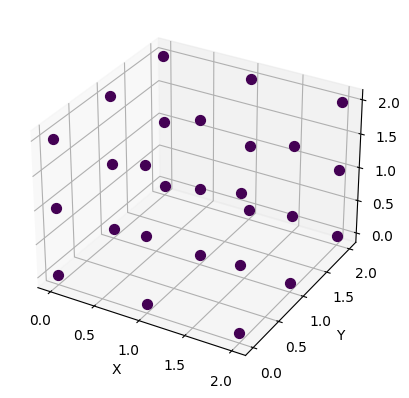

In [10]:
def plot_3d_text(text_3d, num_pages_to_plot, marker_size=10):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Iterate over each page, up to num_pages_to_plot
    for i, page in enumerate(text_3d[:num_pages_to_plot]):
        # Iterate over each row in the page
        for j, row in enumerate(page):
            # Iterate over each character in the row
            for k, char in enumerate(row):
                if char != '':
                    ax.scatter(k, j, i, c=ord(char), marker='o', s=marker_size)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Plot the first 3 pages of the 3D text
plot_3d_text(text_3d, num_pages_to_plot=3, marker_size=50)


In [ ]:

def plot_3d_text(text_3d):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Iterate over each page
    for i, page in enumerate(text_3d):
        # Iterate over each row in the page
        for j, row in enumerate(page):
            # Iterate over each character in the row
            for k, char in enumerate(row):
                if char != '':
                    ax.scatter(k, j, i, c=ord(char), marker='o', s=50)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()


# Plot the 3D text

plot_3d_text(text_3d)

In [ ]:
# faster version
def plot_3d_text(text_3d, sample_rate=1, marker_size=10):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Iterate over each page
    for i, page in enumerate(text_3d):
        # Iterate over each row in the page
        for j, row in enumerate(page):
            # Iterate over each character in the row
            for k, char in enumerate(row):
                if char != '' and (i * j * k) % sample_rate == 0:
                    ax.scatter(k, j, i, c=ord(char), marker='o', s=marker_size)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Plot the 3D text with optimizations
plot_3d_text(text_3d, sample_rate=10, marker_size=5)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


In [ ]:
#clone data into datafile
! git clone https://github.com/roni762583/bible-data-science.github.io.git
# copy my datafile
! cp /content/bible-data-science.github.io/data/t3utf.dat datafile
# delete unused parts
! rm -rf /content/bible-data-science.github.io/
! ls -la

Cloning into 'bible-data-science.github.io'...
remote: Enumerating objects: 223, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 223 (delta 41), reused 60 (delta 34), pack-reused 152
Receiving objects: 100% (223/223), 8.58 MiB | 12.57 MiB/s, done.
Resolving deltas: 100% (118/118), done.
total 5648
drwxr-xr-x 1 root root    4096 Apr  2 09:55 .
drwxr-xr-x 1 root root    4096 Apr  2 08:57 ..
drwxr-xr-x 4 root root    4096 Mar 30 13:52 .config
-rw-r--r-- 1 root root 5763655 Apr  2 09:55 datafile
drwxr-xr-x 1 root root    4096 Mar 30 13:53 sample_data


In [ ]:
# This section deals with cleaning up the data in prep. for ELS searches

# get unicode codes for each char in file preserving order and lines stucture 01/25/2021
f = 'א'
ef = f.encode("unicode_escape")
df = ef.decode("unicode_escape")
print(f,ef,df)
print('-----')
file = open('datafile','r')
lineCount = 0
NonHebrewCharsLst = list() # list to hold non-Hebrew block chars
badLines = list() # list for line numbers with non-Hebrew chars to manually review
exceptions = [' ']
nonHebrewLtrCt = 0 # loop counter
for line in file:
    lineCount += 1
    index = line.rfind('|')+1
    verse = line[:index] # from begining to last occurance of | symbol
    lineText = line[index:].strip()#.replace('׃','') #strip removes newline char, replace removes sof-pasuk colon

    # range of character code points in unicode Hebrew Block: 0590..05FF; Hebrew
    for char in lineText:
      hexS = hex(ord(char)) # string type, holding hex code of integer representing the Unicode character.
      intS = str(int(hexS,16)).encode("unicode_escape").decode("unicode_escape") # string type, int representing  the Unicode character
      # print('block start: ', int('0x590',16), 'char: ', int(hexS,16), 'block end: ', int('0x5FF',16))
      #break
      bol1 = int(hexS,16)>=int('0x590',16)
      bol2 = int(hexS,16)<=int('0x5FF',16)
      bol3 = bol1 and bol2
      # print(bol3)
      if (bol3): #i.e. if in Hebrew char block
        continue
        print(chr(int(hexS,16))) # hex code for char in
      else: # if char not in Hebrew block of unicode
        if (char in exceptions):
          continue
        nonHebrewLtrCt += 1
        NonHebrewCharsLst.append(intS) # str(int(hexS,16)))
        badLines.append(lineCount)
    if(not(bol3)):
      print('on line ', lineCount, 'look for ', line)
      cleanLine = lineText.replace('׃','') # replace removes sof-pasuk colon
      kri = cleanLine
# output results
print('line count: ', lineCount)
print('verse: ', verse)
print('lineText: ', lineText)
encodedVerse = lineText.encode("unicode_escape")
decodedVerse = encodedVerse.decode("unicode_escape")
print('code points: ', encodedVerse)
print('decoded verse: ', decodedVerse)
uniqueChars = list(set(lineText)) # get unique chars list
print('unique chars: ', uniqueChars)

uniqueNonHebrewCharsLst = list(set(NonHebrewCharsLst))
print('number of unique non-Hebrew block chars', len(uniqueNonHebrewCharsLst))
# print out total count of non-Hebrew block chars, and unique set of charsof this count
print('nonHebrewLtrCt: ', nonHebrewLtrCt, '\nunique list: ', uniqueNonHebrewCharsLst)
# dictionary for line numbers of non-Hebrew occurances
dic = dict()
for c in uniqueNonHebrewCharsLst:
  #print(chr(int(c)))
  if chr(int(c)) in dic:
    dic[chr(int(c))] = dic[chr(int(c))] + 1
  else:
    dic[chr(int(c))] = 1
# print dictionary
#print('dictionary of non-Heb char ct: ', dic)
#print(int('0x5FF',16))
#print(int(hexS,16))
#print()
print(set(badLines))
print(badLines[0])
#print(len(s))


א b'\\u05d0' א
-----
on line  731 look for  gen|27|3|וְעַתָּה֙ שָׂא־נָ֣א כֵלֶ֔יךָ תֶּלְיְךָ֖ וְקַשְׁתֶּ֑ךָ וְצֵא֙ הַשָּׂדֶ֔ה וְצ֥וּדָה לִּ֖י <font color="brown">צֵידָה</font> <font color="blue">צָֽיִד׃</font> 

on line  1319 look for  gen|43|28|וַיֹּאמְר֗וּ שָׁלֹ֛ום לְעַבְדְּךָ֥ לְאָבִ֖ינוּ עֹודֶ֣נּוּ חָ֑י וַֽיִּקְּד֖וּ <font color="brown">וַיִּשְׁתַּחוּ</font> <font color="blue">וַיִּֽשְׁתַּחֲוּֽוּ<font color="red"><sup>1</font></sup>׃</font> 

on line  1485 look for  gen|49|11|אֹסְרִ֤י לַגֶּ֙פֶן֙ <font color="brown">עִירֹה</font> <font color="blue">עִירֹ֔ו</font> וְלַשֹּׂרֵקָ֖ה בְּנִ֣י אֲתֹנֹ֑ו כִּבֵּ֤ס בַּיַּ֙יִן֙ לְבֻשֹׁ֔ו וּבְדַם־עֲנָבִ֖ים <font color="brown">סוּתֹה</font> <font color="blue">סוּתֹֽו׃</font> 

on line  2613 look for  exo|37|8|כְּרוּב־אֶחָ֤ד מִקָּצָה֙ מִזֶּ֔ה וּכְרוּב־אֶחָ֥ד מִקָּצָ֖ה מִזֶּ֑ה מִן־הַכַּפֹּ֛רֶת עָשָׂ֥ה אֶת־הַכְּרֻבִ֖ים מִשְּׁנֵ֥י <font color="brown">קִצְוֹותֹו</font> <font color="blue">קְצֹותָֽיו׃</font> 

on line  4023 look for  num|10|34|וַעֲנַ֧ן יְ

In [ ]:
# Build Tanach string without non-Hebrew letters characters
# Opening file
file1 = open('datafile', 'r')
count = 0
s = '' # basic Hebrew chars string
s2 = '' # non-Hebrew chars string
# dataframe for reshaped data
# df = pd.dataframe()
# loop over file line by line, one verse per line
for line in file1:
    count += 1
    #print("Line{}: {}".format(count, line.strip()))
    #print(line[0]) # first character in line
    #print(line.rfind('|')) # last index of pipe '|' character
    line = (line[line.rfind('|')+1:]).replace('׃','') #remove verse and sof-pasuk colon
    line = line.strip() # remove newline char
    line = line.replace(" ", "") # remove spaces
    for c in line:
      if c in {'א', 'ב', 'ג' ,'ד','ה','ו','ז','ח','ט','י','כ','ך','ל','מ','ם','נ','ן','ס','ע','פ','ף','צ','ץ','ק','ר','ש','ת'}:
        s += c # concat Hebrew letter to s
      else:
        s2 += c
print (list(set(s))) # get unique chars list
print (s[-1]) # print last letter ל
print (s)
# Closing files
file1.close()

['ל', 'ת', 'ה', 'ר', 'ב', 'נ', 'ף', 'ז', 'ח', 'ט', 'ן', 'י', 'כ', 'ם', 'ו', 'ש', 'ך', 'פ', 'מ', 'ג', 'ד', 'ע', 'ץ', 'צ', 'א', 'ק', 'ס']
ל
בראשיתבראאלהיםאתהשמיםואתהארץוהארץהיתהתהוובהווחשךעלפניתהוםורוחאלהיםמרחפתעלפניהמיםויאמראלהיםיהיאורויהיאורויראאלהיםאתהאורכיטובויבדלאלהיםביןהאורוביןהחשךויקראאלהיםלאוריוםולחשךקראלילהויהיערבויהיבקריוםאחדויאמראלהיםיהירקיעבתוךהמיםויהימבדילביןמיםלמיםויעשאלהיםאתהרקיעויבדלביןהמיםאשרמתחתלרקיעוביןהמיםאשרמעללרקיעויהיכןויקראאלהיםלרקיעשמיםויהיערבויהיבקריוםשניויאמראלהיםיקווהמיםמתחתהשמיםאלמקוםאחדותראההיבשהויהיכןויקראאלהיםליבשהארץולמקוההמיםקראימיםויראאלהיםכיטובויאמראלהיםתדשאהארץדשאעשבמזריעזרעעץפריעשהפרילמינואשרזרעובועלהארץויהיכןותוצאהארץדשאעשבמזריעזרעלמינהוועץעשהפריאשרזרעובולמינהוויראאלהיםכיטובויהיערבויהיבקריוםשלישיויאמראלהיםיהימארתברקיעהשמיםלהבדילביןהיוםוביןהלילהוהיולאתתולמועדיםולימיםושניםוהיולמאורתברקיעהשמיםלהאירעלהארץויהיכןויעשאלהיםאתשניהמארתהגדליםאתהמאורהגדללממשלתהיוםואתהמאורהקטןלממשלתהלילהואתהכוכביםויתןאתםאלהיםברקיעהשמיםלהאירעלהארץולמשלביוםובלילהולהבדילביןהאורובין

In [ ]:

unicode_points = [ord(c) for c in s]


import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Set the size of the one-hot encoding array to be large enough to include all possible Unicode characters
num_points = 65536
one_hot = np.zeros((len(unicode_points), num_points))
for i, point in enumerate(unicode_points):
    one_hot[i, point] = 1

input_data = np.expand_dims(one_hot[:-1], axis=0)
output_data = np.expand_dims(one_hot[1:], axis=0)

# Define the model architecture
model = Sequential()
model.add(LSTM(4, input_shape=(None, num_points)))
model.add(Dense(num_points, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Train the model
model.fit(input_data, output_data, epochs=500)

# Test the model
test_input = np.expand_dims(one_hot[:1], axis=0)
predicted_output = ''
for i in range(len(s)-1):
    output_probs = model.predict(test_input)[0]
    predicted_point = np.argmax(output_probs)
    predicted_output += chr(predicted_point)
    test_input = np.expand_dims(output_probs, axis=0)
print('Predicted:', predicted_output)

In [ ]:
# Pull off els substrings, offset strings = els

def findTermIndeces(text, term):
  # print('hello from findTermIndeces()')
  indxLst = list()
  indx = text.find(term) # index of first occurance of term
  while indx != -1: # while term is found in text
    indxLst.append(indx) # add index of found term to index list
    indx = text.find(term,indx+1) # find next occurance of search term after index of prev. find
  return indxLst

def searchELS(text, term, minELS, maxELS):
  # print('hello from searchELS()')
  # initially address positive ELS values only
  # ternary-operator
  minELS = minELS if minELS>0 else 1
  foundTermIndeces = list() # empty list to hold indeces of found search term
  results = dict()
  elsRng = range(minELS, maxELS)
  for els in elsRng:
    # print('searching ELS = ', els)
    # get ELS substring with offset from 0 to els (current els being examined)
    # n = ELS substrings required to cover search space
    for offset in range(0, els): # get all offsets from 0 to els
      shiftedString = text[offset::els] # get offset string
      #foundTermIndeces = foundTermIndeces + findTermIndeces(shiftedString, term) # append new list of indeces to exisiting built list
      foundTermIndeces = findTermIndeces(shiftedString, term) # append new list of indeces to exisiting built list
      if not (foundTermIndeces): # don't store empty lists
        continue
      t = tuple([offset, foundTermIndeces]) # store offset to reconstrct indeces, result indeces are of shifted string, not of orig. text
      if(els>0): # els 0 is non-sensical, open text is els = 1 here
        results[els] = t # add found indeces to dictionary keyed by els
      foundTermIndeces = list() # clean out old list
  return results
# ex:
# print(searchELS(s,'עדנה', 0, 17))

In [ ]:
def findTermIndecesWithOffset(text, term, offset):
  # print('hello from findTermIndecesWithOffset()')
  indxLst = list()
  indx = text.find(term) # index of first occurance of term
  while indx != -1: # while term is found in text
    offset = offset if offset!=0 else 1
    indxLst.append(indx*offset) # add index of found term to index list, THE INDEX IN ORIGINAL TEXT
    indx = text.find(term,indx+1) # find next occurance of search term after index of prev. find
  return indxLst



def searchELSmod(text, term, minELS, maxELS):
  # print('hello from searchELS()')
  # initially address positive ELS values only
  # ternary-operator
  minELS = minELS if minELS>0 else 1
  foundTermIndeces = list() # empty list to hold indeces of found search term
  results = dict()
  elsRng = range(minELS, maxELS)
  for els in elsRng:
    # print('searching ELS = ', els)
    # get ELS substring with offset from 0 to els (current els being examined)
    # n = ELS substrings required to cover search space
    for offset in range(0, els): # get all offsets from 0 to els
      shiftedString = text[offset::els] # get offset string
      #foundTermIndeces = foundTermIndeces + findTermIndeces(shiftedString, term) # append new list of indeces to exisiting built list
      foundTermIndeces = findTermIndecesWithOffset(shiftedString, term, offset) # append new list of indeces to exisiting built list
      if not (foundTermIndeces): # don't store empty lists
        continue
      t = tuple([offset, foundTermIndeces]) # store offset to reconstrct indeces, result indeces are of shifted string, not of orig. text
      if(els>0): # els 0 is non-sensical, open text is els = 1 here
        results[els] = foundTermIndeces # these indeces are supposed to be equal to the indeces in the original text
      foundTermIndeces = list() # clean out old list
  return results
# ex:
# print(searchELS(s,'עדנה', 0, 17))

In [ ]:
# get user input for search term
term1 = input ("Enter Primary Search Term:")
print(term1)


Enter Primary Search Term:עדנה
עדנה


In [ ]:
print(searchELSmod(s, term1, -10, 5))

{1: [21078, 108600, 574590, 835684, 1019725, 1169894], 2: [226804, 435273], 3: [763544], 4: [171879, 173530]}


In [ ]:
# This section deals with reconstructing ELS codes for validation
# need to make use of offset value to reconstruct properly
# ex:
maxELS = 5
# get results dict
results = searchELSmod(s, term1, 0, maxELS)
# helper var
builtString = ''
# loop over results
for k in results: # for each key in results dictionary
  for idx in results[k]: # for each index in list
    # build print string
    for i in range(0, len(term1)):
      builtString += s[idx+i*k]
    print(builtString)
    builtString = ''

עדנה
עדנה
עדנה
עדנה
עדנה
עדנה
יוול
לוקנ
קייר
מםיא
םדנו


In [ ]:
# write no spaces string to file - only run once
text_file = open("NoSpacesTanach.dat", "w")
text_file.write(s)
text_file.close()

# delete intermediary datafile
! rm datafile

#see
! ls -la

total 2368
drwxr-xr-x 1 root root    4096 Jan 17 05:33 .
drwxr-xr-x 1 root root    4096 Jan 17 02:30 ..
drwxr-xr-x 1 root root    4096 Jan  8 17:11 .config
-rw-r--r-- 1 root root 2405776 Jan 17 05:33 NoSpacesTanach.dat


In [ ]:
# download result file - only run once
from google.colab import files
files.download('NoSpacesTanach.dat')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>